In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [4]:
X,y = datasets.make_classification(n_classes=2,n_samples= 100, n_features=4)

4 dim input matrix X, 

binary classification problem, 

y (can take 0 or 1)

In [5]:
X.shape, y.shape


((100, 4), (100,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True)

In [7]:
2*[1,2,3] ##

[1, 2, 3, 1, 2, 3]

Gradient Ascent method

In [8]:
def g(z):
    return 1/(1 +  math.exp(-z))

In [9]:
class Logistic_Regression:
    def __init__(self, lr, n_iter) -> None:
        self.theta = None
        self.lr = lr
        self.n_iter = n_iter

    def fit(self, X, y):
        n_features = len(X[0])
        n_samples = len(X)

        self.theta =[0]* n_features

        for _ in range(self.n_iter):
            z,y_pred,dJ = [0]*n_samples,[0]*n_samples,[0]*n_samples

            for i in  range(n_samples):
                for j in range(n_features):
                   z[i] += self.theta[j]*X[i][j]
                y_pred[i] = g(z[i])

            for j in range(n_features):
                for i in range(n_samples):
                    dJ[j] += (y_pred[i] - y[i])*X[i][j]

            for j in range(n_features):
                self.theta[j] -= self.lr * dJ[j]
        
        return self.theta
    
    def predict(self,X):
        n_features = len(X[0])
        n_samples = len(X)
        z,y_pred = [0]*n_samples,[0]*n_samples


        for i in  range(n_samples):
                for j in range(n_features):
                   z[i] = self.theta[j]*X[i][j]
                y_pred[i] = g(z[i])
                if y_pred[i] >= 0.5 : 
                    y_pred[i] = 1
                else: 
                    y_pred[i] = 0

        
        return y_pred
    
        

In [10]:
LoR = Logistic_Regression(lr=0.001,n_iter=100)

LoR.fit(X_train,y_train)
LoR.predict(X_test)

[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

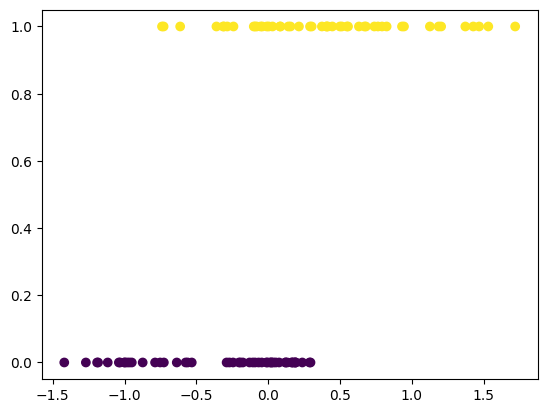

In [11]:
plt.scatter(X[:,0],y,c=y)